# Vowel Formants Exploration

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datascience as ds

## 1. Exploring TIMIT Data

First we will start off by exploring and analyze real TIMIT data taken from 8 different regions of the TIMIT corpus. These measurements are taken at the midpoint of vowels, and vowel boundaries were determined automatically using forced alignment (Penn FA). Try running the cell below.

In [3]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)
timit.head(20)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


Each column represents a different attribute and is explained below:

speaker: unique speaker ID

gender: speaker’s self-reported gender

file: the filename — each sentence is recorded to a different file

t: time in the file measurements made (seconds)

word: lexical item (according to sentence prompt, not necessarily accurate)

vowel/stress: vowel ID in ARPABET (via CMU dictionary within Penn FA; not necessarily accurate)

duration: vowel duration given boundaries determined by Penn FA (seconds)

f0/f1/f2/f3: f0 and F1-F3 via ifcformant in BPM (Hz)

### 1.1 Data Visualization

Now that we have organized all our data in a table, lets draw some plots to visualize them better. Run the cell below to see the distribution of f1.

/Users/frys/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


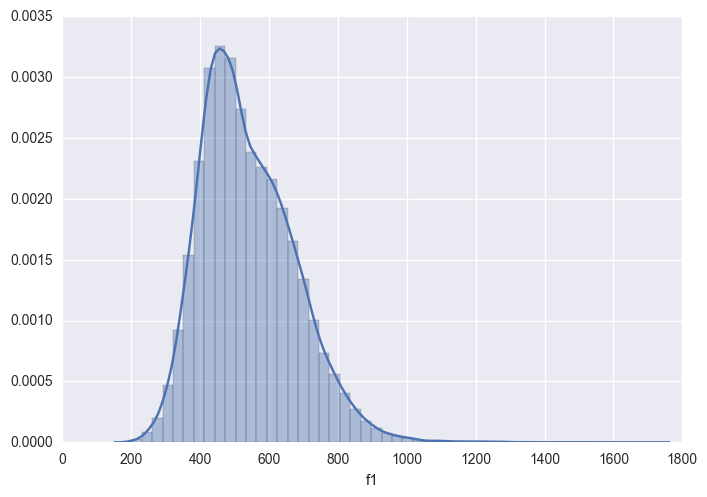

In [9]:
sns.distplot(timit["f1"])

#### Question

Can you estimate the mean of the distribution above? Edit the text in the cell below to enter your response by double clicking on the text box.

ANSWER: 

Lets try visualizing the plots for f1,f2,f3 along the same axes. Try running the cell below.

/Users/frys/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


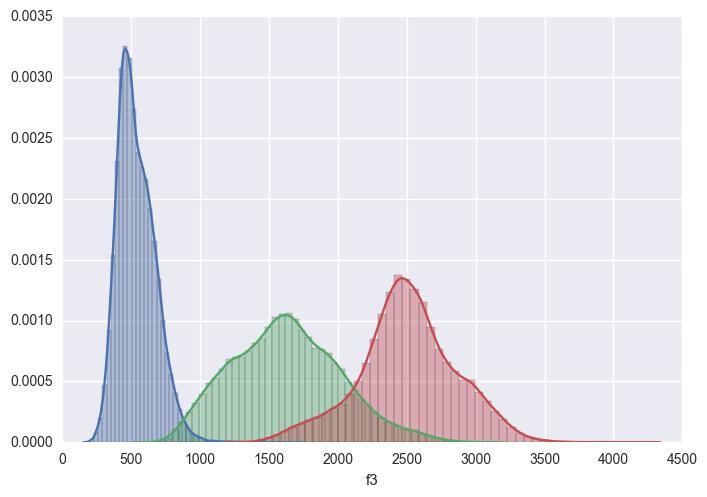

In [10]:
sns.distplot(timit["f1"]) ##In Blue
sns.distplot(timit["f2"]) ##In Green
sns.distplot(timit["f3"]) ##In Red

The blue color represents the distribution of f1, the green color represents the distribution of f2, and the red color represents the distribution of f3.

#### Question
Write 2-3 sentences describing what you see in the visualization.

ANSWER: 

### 1.2 Differences Based on Gender

Now we will be taking a look at differences based on gender. Try running the cell below.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114efcdd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113b36748>], dtype=object)

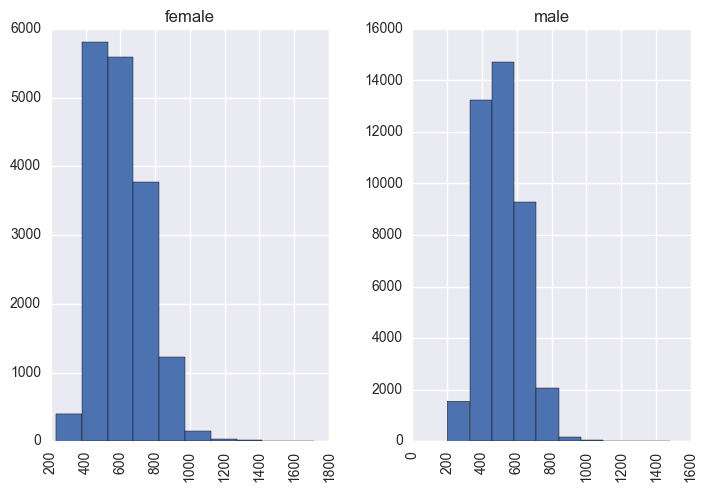

In [11]:
timit['f1'].hist(by=timit['gender'])

#### Question
Does there seem to be a notable difference between male and female distributions of f1? Remember to pay close attention to the y-axis!

ANSWER:

Running the cells below we can compare the distribution of f0, f2, f2 based on gender using the same plot. Is there a noticebale difference between the two genders?

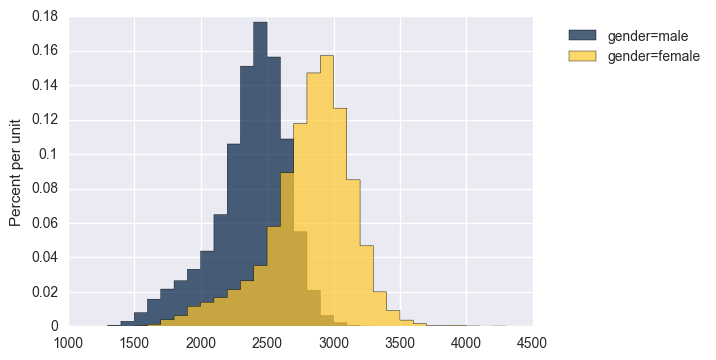

In [18]:
table = ds.Table.from_df(timit)
table.select(['f3', 'gender']).hist(group='gender', bins=range(1300, 4400, 100))

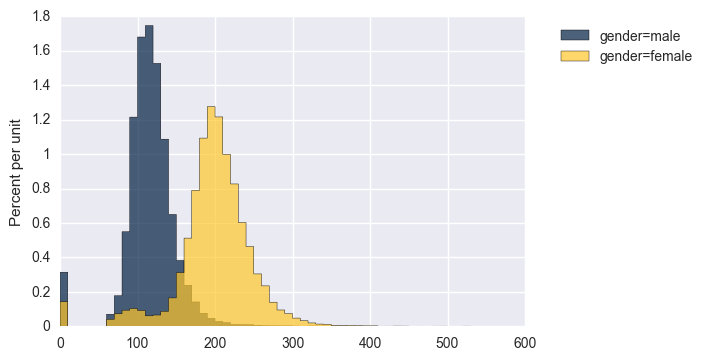

In [19]:
table.select(['f0', 'gender']).hist(group='gender', bins=range(0, 550, 10))

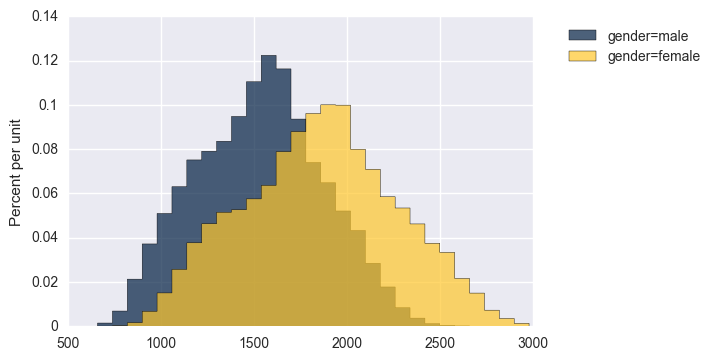

In [26]:
table.select(['f2', 'gender']).hist(group='gender', bins=range(500, 3000, 80))

## 2. Vowel Spaces

Using the TIMIT data, we can now construct a vowel chart! First we will need to convert our ARPABET symbols into the IPA conventions. Run the two cells below to see a new table using IPA Symbols.

In [39]:
vows = timit["vowel"]
IPAdict = {"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"}
newVows = []
for i in vows:
    newVows += [IPAdict[i]]
timit['IPA'] = newVows

We start of by grouping all the rows by their vowel and calculating the mean for each column attribute for each vowel.

In [30]:
avgs = timit.groupby('IPA').mean()
avgs.head()

,t,stress,duration,f1,f2,f3,f0
IPA,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471


### 2.1 Constructing a Vowel Space

Lets construct a vowel space! Run the cell below to view the vowel space of f1 vs f2.

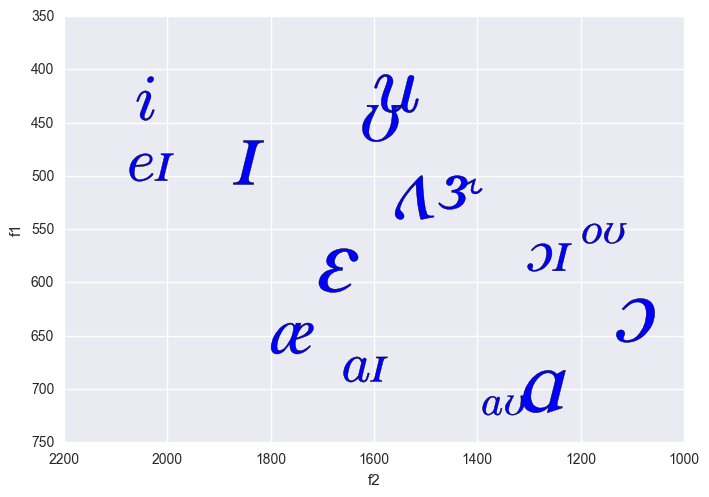

In [32]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2')

### 2.2 Using Logarithmic Axes

In the visualization above we use linear axes in order to construct our vowel space. Lets observe how the vowel space would change using logarithmic axes. The cell below will take the log of all values in our f1 and f2 columns and add them as new columns of our TIMIT table

In [41]:
import math
logf1 = []
logf2 = []
for i in timit["f1"]:
    logf1 += [math.log(i)]
for j in timit["f2"]:
    logf2 += [math.log(j)]
timit["logf1"] = logf1
timit["logf2"] = logf2
newavgs = timit.groupby('IPA').mean()
newavgs.head()

,t,stress,duration,f1,f2,f3,f0,logf1,logf2
IPA,,,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785,6.510240,7.378111
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457,6.564378,7.195039
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900,6.185279,7.608959
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357,6.036894,7.608724
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471,6.303124,7.031348


Lets plot the new vowel space using these new columns

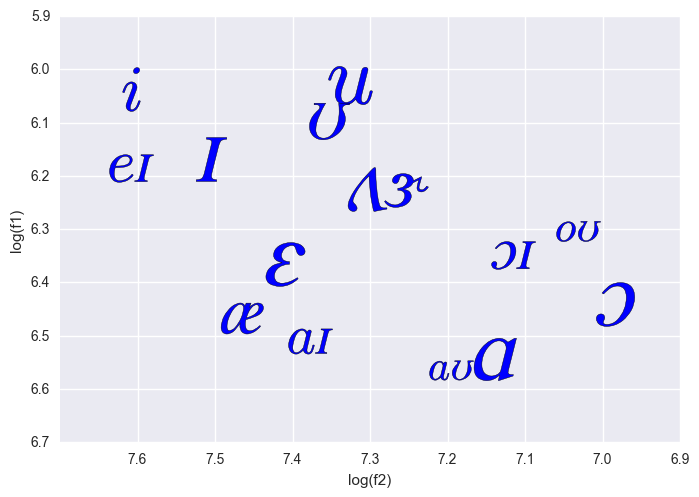

In [63]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

### Question
How would you describe the vowel space above?

ANSWER:

### 2.3 Further Visualizations

Run the cells below to see more visualizations of the vowel space created from our TIMIT data!

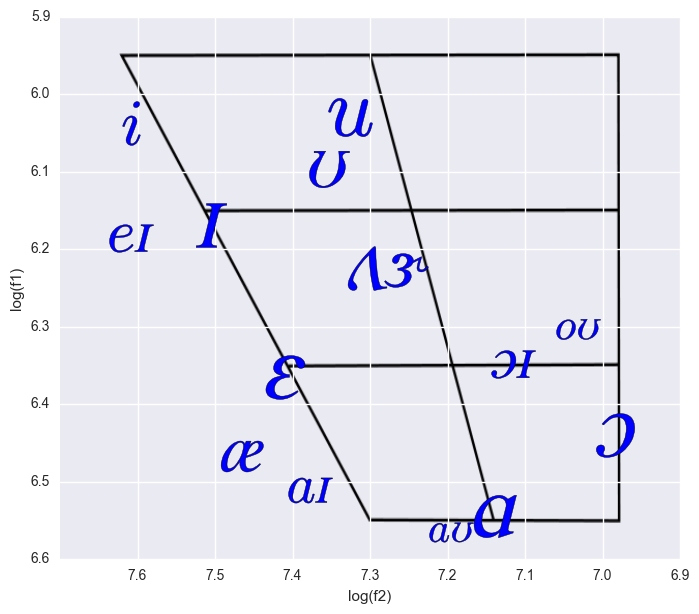

In [67]:
plt.figure(figsize=(8, 10))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(newavgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

im = plt.imread('images/blankvowel.png')
ax = plt.imshow(im, extent=(plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]))

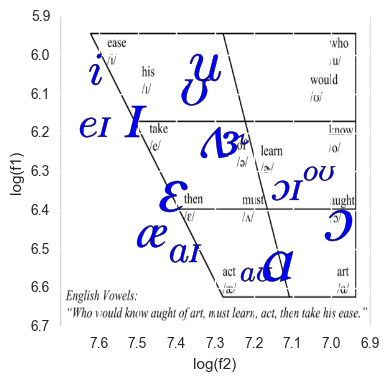

In [71]:
plt.figure(figsize=(10,4))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=500)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

im = plt.imread('images/notblank.png')
ax = plt.imshow(im, extent=(7.7, 6.9, 6.7, 5.9))

# 3. Corner Vowels

Our next step is to plot the relationship between corner vowels. Lets compare the F1 vs F2 corner vowels. Run the cell below to select the corner vowels.

In [51]:
IPAtable = ds.Table.from_df(timit)

pick_vowel = lambda vowel: table.where(IPAtable['IPA'] == vowel)

i = pick_vowel('i')
ar = pick_vowel('aɪ')
a = pick_vowel('ɑ')
u = pick_vowel('u')

corners = [i,ar,a,u]

Now that we have collected all the corner vowels, lets start comparing them! Run the cell below to plot the "a" (in blue)and "i" (in red) corner vowels from f1 and f2. Take note of the differences in distribution.

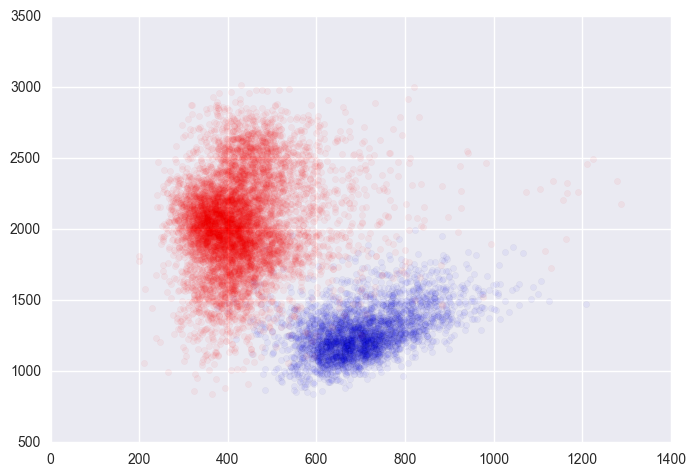

In [60]:
plt.scatter(a['f1'], a['f2'], alpha=.05)
plt.scatter(i['f1'], i['f2'], alpha=.05, color='r')

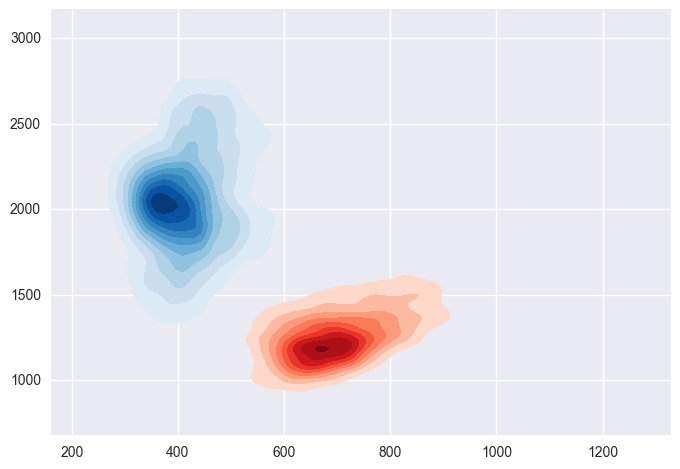

In [58]:
ax = sns.kdeplot(a['f1'], a['f2'], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(i['f1'], i['f2'], cmap="Blues", shade=True, shade_lowest=False)

Every colored dot in the first graph represents a data point, and the second graph highlights the relative density of each dataset at certain areas.

#### Question

Describe and compare the distribution of the two vowels. What seems to be the average value of each vowel? Whats the min and max?

ANSWER:

Lets try to create similar visualizations for the "ar" and "u" vowels in F1 and F2.

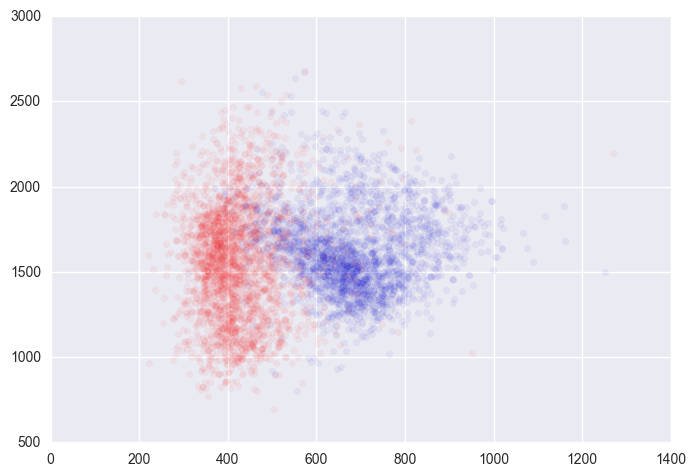

In [56]:
plt.scatter(ar['f1'], ar['f2'], alpha=.05)
plt.scatter(u['f1'], u['f2'], alpha=.05, color='r')

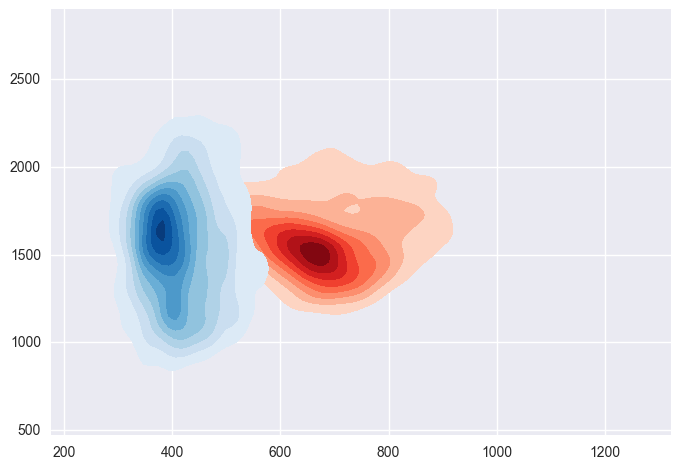

In [61]:
ax = sns.kdeplot(ar['f1'], ar['f2'], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(u['f1'], u['f2'], cmap="Blues", shade=True, shade_lowest=False)

#### Question

Describe and compare the distribution of the two vowels. What seems to be the average value of each vowel? Whats the min and max?

ANSWER:

Bringing it all together, we can see the distributions of various corner vowels in the following plot. Run the cell below!

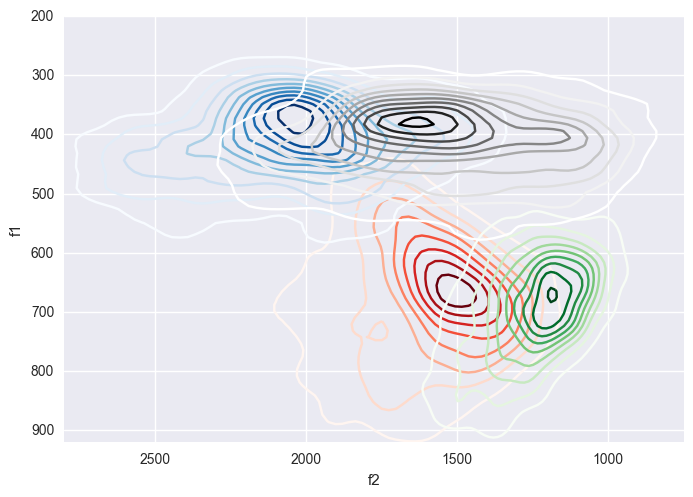

In [62]:
plt.ylim(920, 200)
plt.xlim(2800, 750)

ax = sns.kdeplot(ar['f2'], ar['f1'], cmap="Reds")
ax = sns.kdeplot(i['f2'], i['f1'], cmap="Blues")
ax = sns.kdeplot(a['f2'], a['f1'], cmap="Greens")
ax = sns.kdeplot(u['f2'], u['f1'], cmap="Greys")

plt.ylabel('f1')
plt.xlabel('f2')

## 4. Drawing Our Own Vowel Space

#### NOTE: WE'RE ASSUMING THAT THE FILE UPLOADED BY THE 2017 CLASS WILL FOLLOW THE IPA FORMAT BUT FOR THE SAKE OF A PLACEHOLDER WE WILL USE A FILE FROM THE TIMIT DATA AND CONVERT IT TO IPA FORMAT. THOSE CELLS CAN BE DELETED LATER ON

 (DELETE THIS CELL LATER ON)

### 4.1 Loading the Data

Now that we have analyzed the TIMIT data, its time for us to make our own vowel space! First load our data file by replacing the ellipses, with the file name.

In [77]:
Fall2017_file = 'data/vowel_midpoints_dr1.txt' #CHANGE TO elipses
Fa17 = pd.read_csv(Fall2017_file, sep= "\t").reset_index(drop=True)
Fa17.head(10)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


In [78]:
##Delte this cell later
vows = Fa17["vowel"]
IPAdict = {"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"}
newVows = []
for i in vows:
    newVows += [IPAdict[i]]
Fa17['IPA'] = newVows

As before, we group all the rows by their vowel and calculate the mean for each column attribute for each vowel.

In [81]:
Fa17avgs = Fa17.groupby('IPA').mean()
Fa17avgs.head()

logf1 = []
logf2 = []
for i in Fa17avgs["f1"]:
    logf1 += [math.log(i)]
for j in Fa17avgs["f2"]:
    logf2 += [math.log(j)]
Fa17avgs["logf1"] = logf1
Fa17avgs["logf2"] = logf2
newavgs = timit.groupby('IPA').mean()
newavgs.head()

,t,stress,duration,f1,f2,f3,f0,logf1,logf2
IPA,,,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785,6.510240,7.378111
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457,6.564378,7.195039
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900,6.185279,7.608959
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357,6.036894,7.608724
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471,6.303124,7.031348


### 4.2 Creating our Vowel Space

As we saw before, the visualization of our vowel space looked more accurate using logarithmic axes. Run the cell below to plot our vowel space with logarithmic axes.

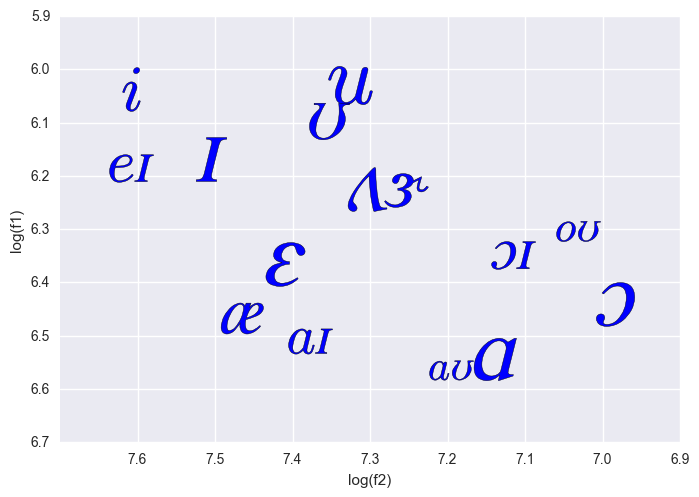

In [82]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

#### Questions
1. Describe the resulting vowel space. How does it compare with the vowel space from the TIMIT data?

ANSWER:

2. What may be the cause for any differences between our vowel space and the one constructed using the TIMIT data? Do you notice any outliers or some points that seem off?

ANSWER:

### Congratulations! We're done